# HOMEWORK8

## PART 1. Pulsarstar

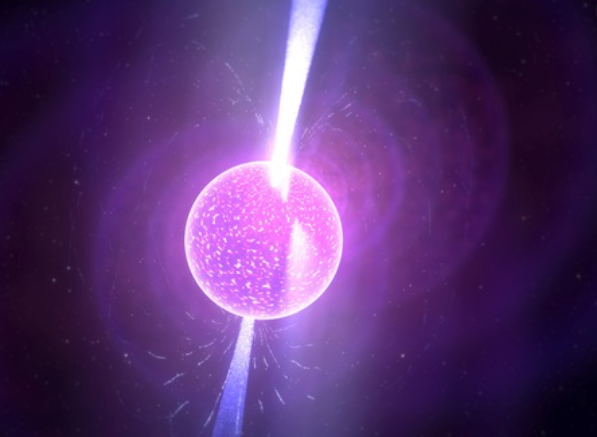

In [3]:
from IPython.display import Image
Image(filename='pulsarstar.png') 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
datasetPulsar = pd.read_csv('pulsar_stars.csv')
datasetPulsar.head()

#binary classification for target, pulsar stars can easily give you around 90 acc
# no missing values, no categorical values, just make a ML model and use your knowledge of data visualization
# make proper data analysis, with plotly OR matplotlib, heatmap, boxplot, scatter plots and comparisons, maybe correlation
# get accuracies of different ML algorithms, dont use only 1 algorithm, use at least 3.

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_deviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
# len of data
len(datasetPulsar)

17898

In [6]:
datasetPulsar.info()
# no null data or NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean_of_the_integrated_profile                17898 non-null  float64
 1   Standard_deviation_of_the_integrated_profile  17898 non-null  float64
 2   Excess_kurtosis_of_the_integrated_profile     17898 non-null  float64
 3   Skewness_of_the_integrated_profile            17898 non-null  float64
 4   Mean_of_the_DM_SNR_curve                      17898 non-null  float64
 5   Standard_deviation_of_the_DM_SNR_curve        17898 non-null  float64
 6    Excess_kurtosis_of_the_DM_SNR_curve          17898 non-null  float64
 7    Skewness_of_the_DM_SNR_curve                 17898 non-null  float64
 8   target_class                                  17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [8]:
datasetPulsar['target_class'].value_counts()
# I think we have inbalance data

0    16259
1     1639
Name: target_class, dtype: int64

In [10]:
# Rename the columns for comfort work
datasetPulsar.rename(columns = {'Mean_of_the_integrated_profile' : 'MEAN_IP', \
                               'Standard_deviation_of_the_integrated_profile' : 'STD_IP', \
                               'Excess_kurtosis_of_the_integrated_profile' : 'EX_K_IP', \
                               'Skewness_of_the_integrated_profile' : 'SK_IP', \
                               'Mean_of_the_DM_SNR_curve' : 'MEAN_DM_SNR_CRV', \
                               'Standard_deviation_of_the_DM_SNR_curve' : 'STD_DM_SNR_CRV', \
                               ' Excess_kurtosis_of_the_DM_SNR_curve' : 'EX_K_DM_SNR_CRV', \
                               ' Skewness_of_the_DM_SNR_curve' : 'SK_DM_SNR_CRV'}, inplace = True)

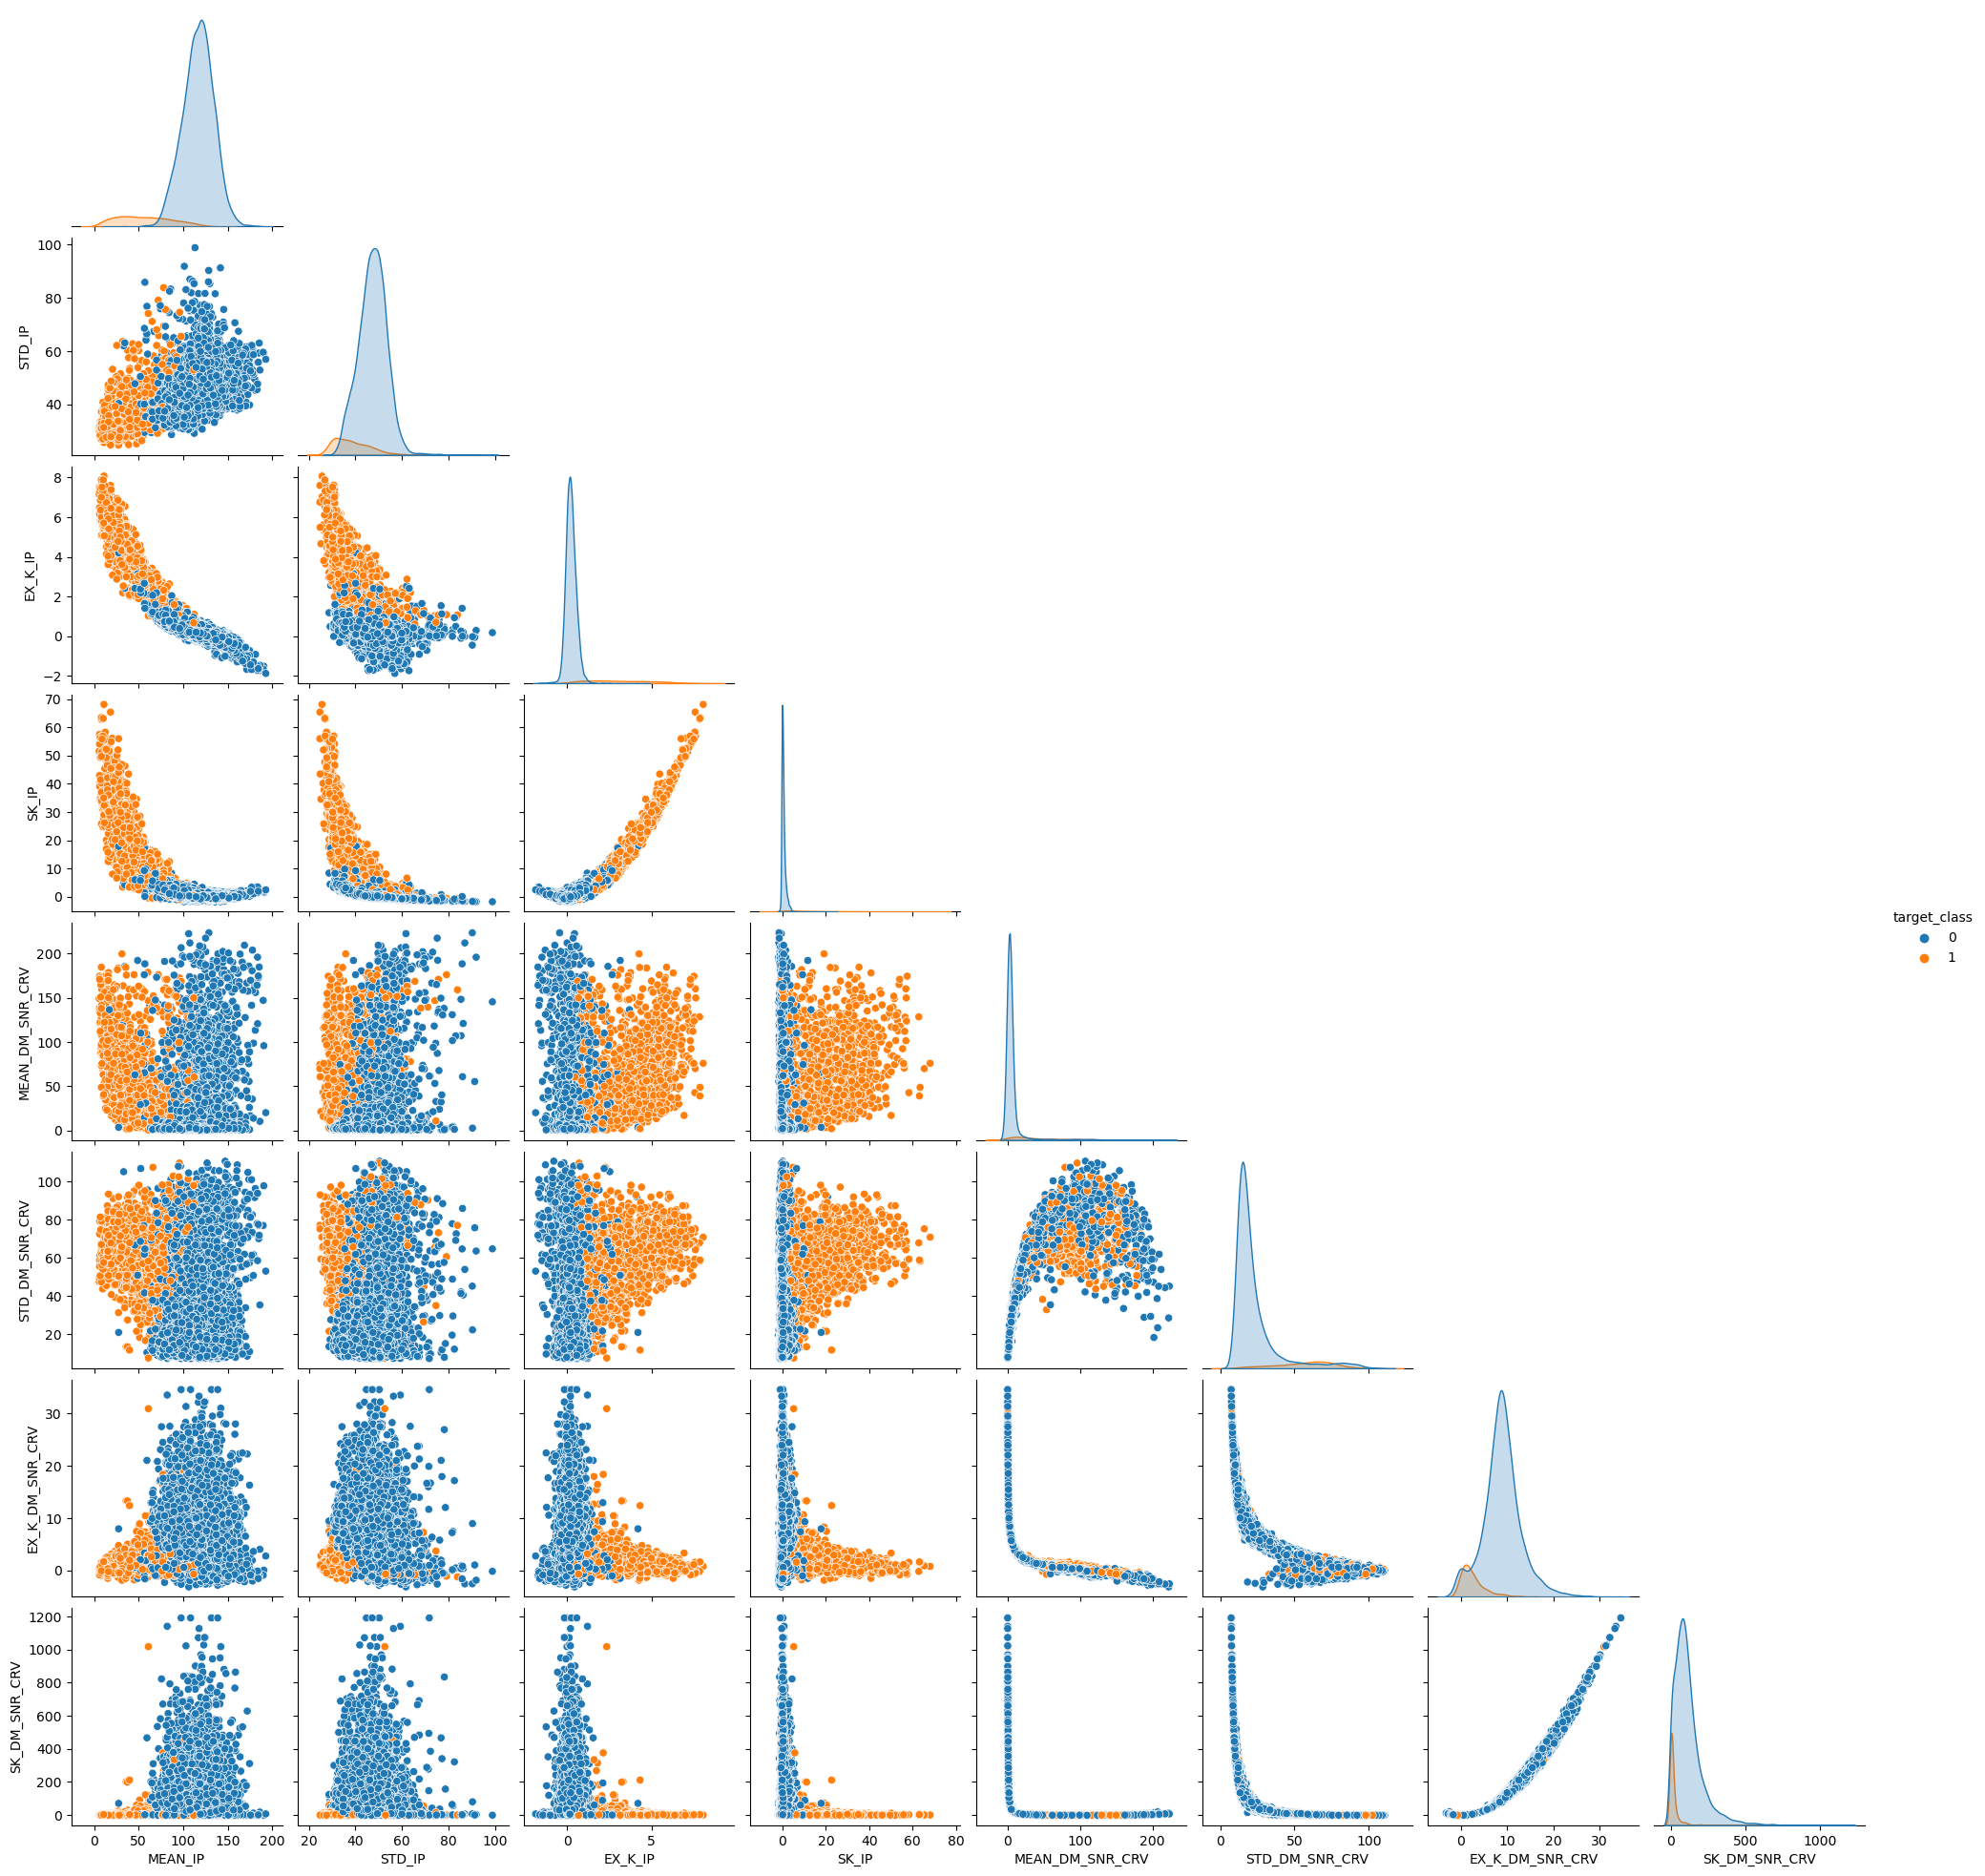

In [11]:
# Let's look at pairwise relationships in a dataset.
import seaborn as sns
sns.pairplot(data = datasetPulsar , hue = 'target_class', corner = True)

In [13]:
# looks like that we can take classification using EX_K_IP(Excess_kurtosis_of_the_integrated_profile) 
# and SK_IP(Skewness_of_the_integrated_profile) columns

<Axes: >

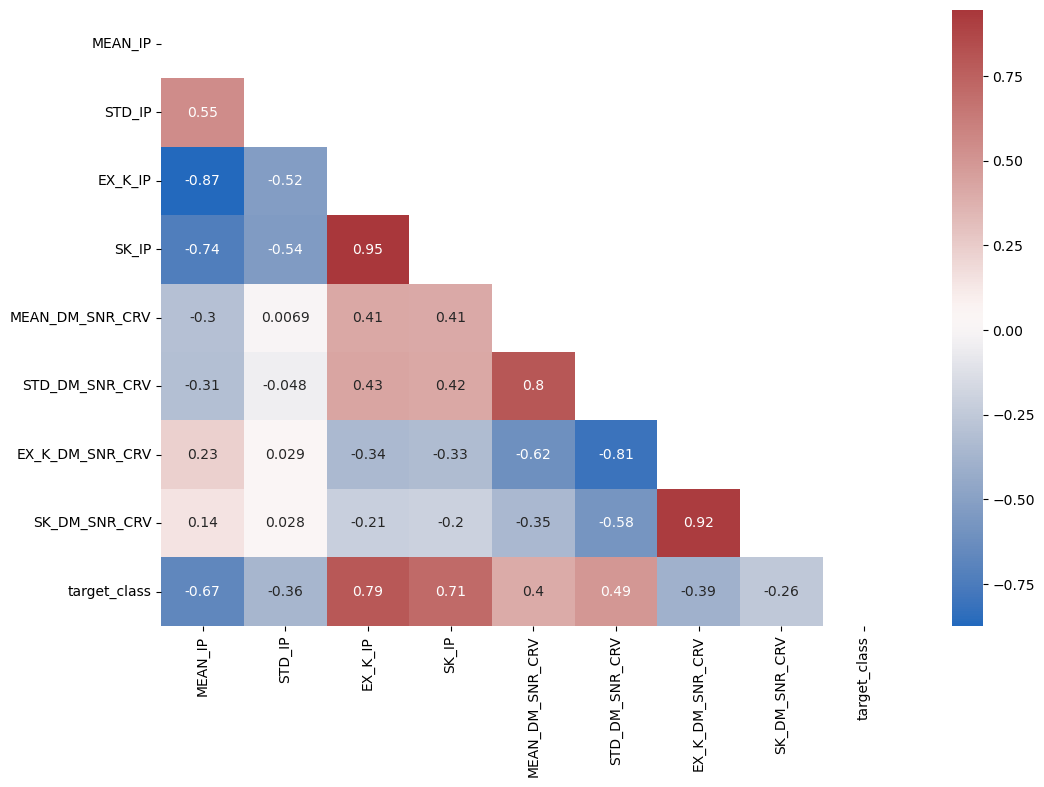

In [14]:
#Let's look of correlation between columns
import numpy as np
mask=np.triu(np.ones_like(datasetPulsar.corr(),dtype=bool))
plt.figure(figsize=(12,8))
sns.heatmap(datasetPulsar.corr(),annot=True,mask=mask,cmap= "vlag")

In [ ]:
# We can see strong correlation beetween SK_IP(Skewness_of_the_integrated_profile) 
# and EX_K_IP(Excess_kurtosis_of_the_integrated_profile)
# also beetween SK_DM_SNR_CRV and EX_K_DM_SNR_CRV
# and beetween STD_DM_SNR_CRV and MEAN_DM_SNR_CRV

In [16]:
# Let's look correlation beetween target_class and rest of columns
datasetPulsar.corr()['target_class'].sort_values(ascending=False)

target_class       1.000000
EX_K_IP            0.791591
SK_IP              0.709528
STD_DM_SNR_CRV     0.491535
MEAN_DM_SNR_CRV    0.400876
SK_DM_SNR_CRV     -0.259117
STD_IP            -0.363708
EX_K_DM_SNR_CRV   -0.390816
MEAN_IP           -0.673181
Name: target_class, dtype: float64

In [ ]:
# result good for EX_K_IP and SK_IP

<Axes: >

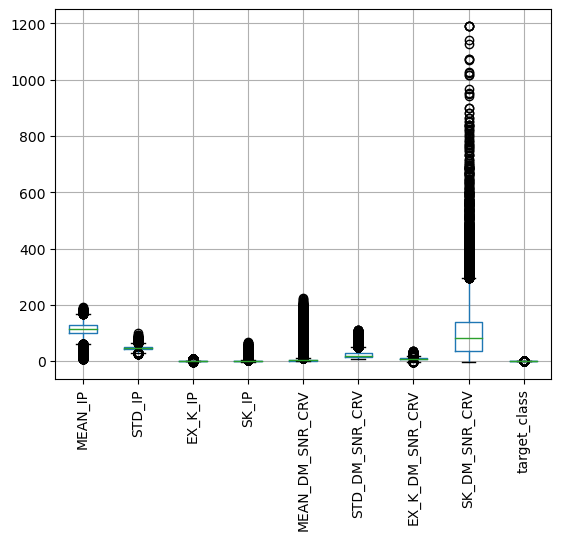

In [17]:
datasetPulsar.boxplot(rot=90)

In [18]:
datasetPulsar.describe()
# maybe EX_K_IP, SK_IP, MEAN_DM_SNR_CRV, SK_DM_SNR_CRV have big deviation

,MEAN_IP,STD_IP,EX_K_IP,SK_IP,MEAN_DM_SNR_CRV,STD_DM_SNR_CRV,EX_K_DM_SNR_CRV,SK_DM_SNR_CRV,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [20]:
#split data
y = datasetPulsar.iloc[:,-1]
data = datasetPulsar.drop('target_class', axis='columns')

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.2, random_state=2)

In [22]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')# binary classification its 0 or 1 , yes or no. Kernel='linear'
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [23]:
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3235   21]
 [  60  264]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3256
           1       0.93      0.81      0.87       324

    accuracy                           0.98      3580
   macro avg       0.95      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580



In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[3230   26]
 [  57  267]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3256
           1       0.91      0.82      0.87       324

    accuracy                           0.98      3580
   macro avg       0.95      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580



In [25]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier()
KN.fit(X_train,y_train)
KN_pred = KN.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,KN_pred))
print(classification_report(y_test,KN_pred))

[[3228   28]
 [  75  249]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3256
           1       0.90      0.77      0.83       324

    accuracy                           0.97      3580
   macro avg       0.94      0.88      0.91      3580
weighted avg       0.97      0.97      0.97      3580



In [26]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, y_train)
y2_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y2_pred))
print(classification_report(y_test,y2_pred))

[[3230   26]
 [  83  241]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3256
           1       0.90      0.74      0.82       324

    accuracy                           0.97      3580
   macro avg       0.94      0.87      0.90      3580
weighted avg       0.97      0.97      0.97      3580



In [27]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression() 
regr.fit(X_train, y_train) #training the algorithm
Log_pred = regr.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,Log_pred))
print(classification_report(y_test,Log_pred))

[[3234   22]
 [  59  265]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3256
           1       0.92      0.82      0.87       324

    accuracy                           0.98      3580
   macro avg       0.95      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout  
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(3, input_dim=8, activation='relu'))  # (inputLayerUnits +1) / 2

model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_without_early=model.fit(X_train, y_train, validation_split=0.35, epochs=200, batch_size=128)

Epoch 1/200
73/73 [==============================] - 1s 3ms/step - loss: 7.2200 - accuracy: 0.5717 - val_loss: 4.7085 - val_accuracy: 0.7131
Epoch 2/200
73/73 [==============================] - 0s 1ms/step - loss: 3.4496 - accuracy: 0.7585 - val_loss: 2.6847 - val_accuracy: 0.7853
Epoch 3/200
73/73 [==============================] - 0s 1ms/step - loss: 2.0293 - accuracy: 0.8183 - val_loss: 1.6700 - val_accuracy: 0.8454
Epoch 4/200
73/73 [==============================] - 0s 1ms/step - loss: 1.3687 - accuracy: 0.8832 - val_loss: 1.2684 - val_accuracy: 0.8982
Epoch 5/200
73/73 [==============================] - 0s 1ms/step - loss: 1.0809 - accuracy: 0.9126 - val_loss: 1.0387 - val_accuracy: 0.9184
Epoch 6/200
73/73 [==============================] - 0s 1ms/step - loss: 0.8962 - accuracy: 0.9264 - val_loss: 0.8722 - val_accuracy: 0.9262
Epoch 7/200
73/73 [==============================] - 0s 1ms/step - loss: 0.7507 - accuracy: 0.9332 - val_loss: 0.7297 - val_accuracy: 0.9344
Epoch 8/200
7

Epoch 59/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0852 - accuracy: 0.9764 - val_loss: 0.0941 - val_accuracy: 0.9735
Epoch 60/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0849 - accuracy: 0.9766 - val_loss: 0.0926 - val_accuracy: 0.9755
Epoch 61/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0851 - accuracy: 0.9757 - val_loss: 0.0940 - val_accuracy: 0.9735
Epoch 62/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0842 - accuracy: 0.9764 - val_loss: 0.0922 - val_accuracy: 0.9749
Epoch 63/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0846 - accuracy: 0.9759 - val_loss: 0.0920 - val_accuracy: 0.9755
Epoch 64/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0845 - accuracy: 0.9769 - val_loss: 0.0929 - val_accuracy: 0.9741
Epoch 65/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.9759 - val_loss: 0.0917 - val_accuracy: 0.9751
Epoch 

73/73 [==============================] - 0s 1ms/step - loss: 0.0806 - accuracy: 0.9758 - val_loss: 0.0879 - val_accuracy: 0.9759
Epoch 117/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0801 - accuracy: 0.9770 - val_loss: 0.0878 - val_accuracy: 0.9751
Epoch 118/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0809 - accuracy: 0.9764 - val_loss: 0.0876 - val_accuracy: 0.9757
Epoch 119/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0801 - accuracy: 0.9768 - val_loss: 0.0881 - val_accuracy: 0.9755
Epoch 120/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0801 - accuracy: 0.9771 - val_loss: 0.0913 - val_accuracy: 0.9737
Epoch 121/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0800 - accuracy: 0.9775 - val_loss: 0.0877 - val_accuracy: 0.9757
Epoch 122/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0802 - accuracy: 0.9763 - val_loss: 0.0875 - val_accuracy: 0.9753
Epoch 123/200

73/73 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.9773 - val_loss: 0.0851 - val_accuracy: 0.9755
Epoch 174/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0774 - accuracy: 0.9773 - val_loss: 0.0852 - val_accuracy: 0.9757
Epoch 175/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.9771 - val_loss: 0.0848 - val_accuracy: 0.9765
Epoch 176/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0780 - accuracy: 0.9779 - val_loss: 0.0896 - val_accuracy: 0.9745
Epoch 177/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9773 - val_loss: 0.0851 - val_accuracy: 0.9755
Epoch 178/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0772 - accuracy: 0.9772 - val_loss: 0.0847 - val_accuracy: 0.9769
Epoch 179/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0771 - accuracy: 0.9776 - val_loss: 0.0859 - val_accuracy: 0.9749
Epoch 180/200

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


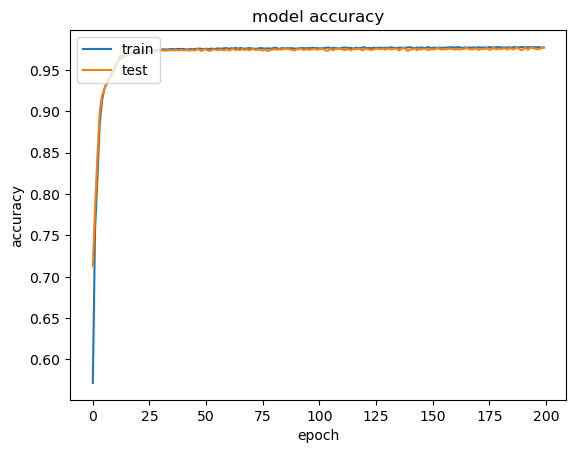

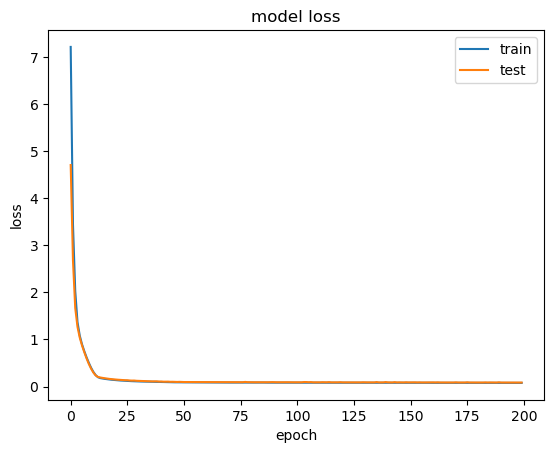

In [30]:
print(model_without_early.history.keys())
# summarize history for accuracy
plt.plot(model_without_early.history['accuracy'])
plt.plot(model_without_early.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_without_early.history['loss'])
plt.plot(model_without_early.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
# summary: this is data gives for any model accurcy more 90%

# # PART 2. HEART DISEASE

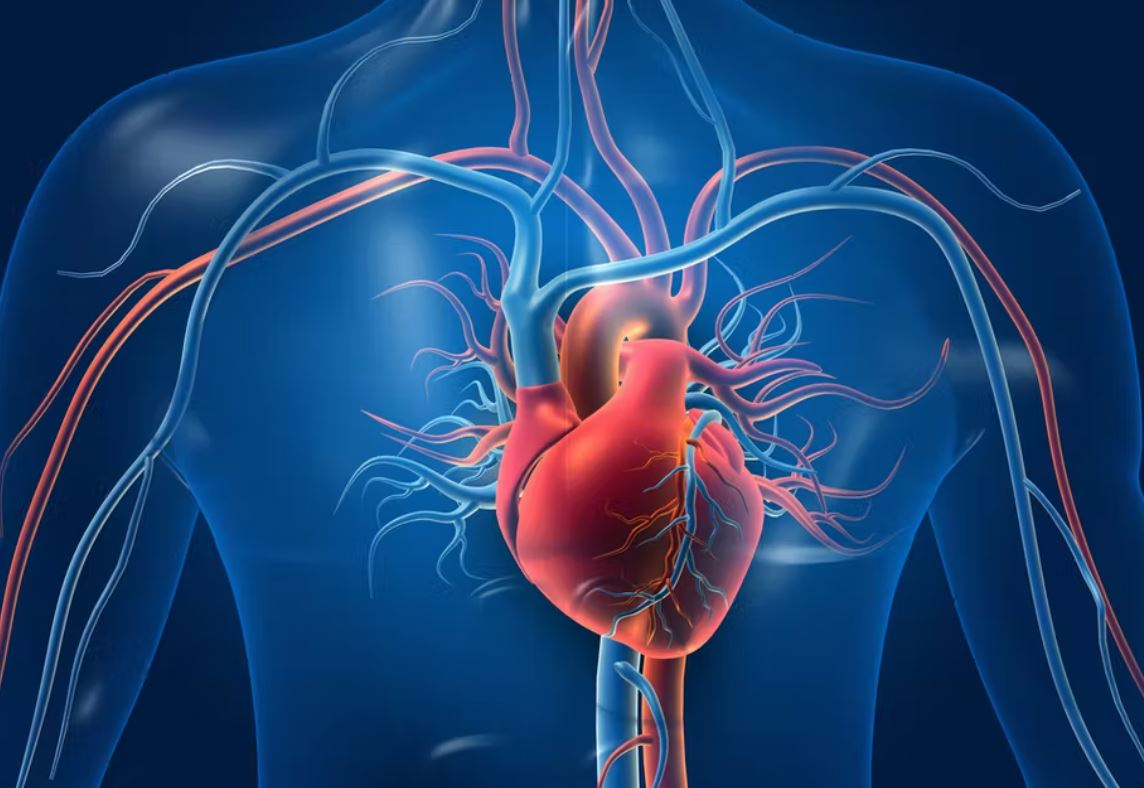

In [31]:
from IPython.display import Image
Image(filename='heart.jpg') 

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
datasetHeart = pd.read_csv('HeartDiseaseDataset.csv') # you will not receive very high accuracy 
datasetHeart.head()
#binary classification for target
#https://journalofbigdata.springeropen.com/articles/10.1186/s40537-021-00524-9
#https://archive.ics.uci.edu/ml/datasets/heart+disease
# no missing values, no categorical values, just make a ML model and use your knowledge of data visualization
# get accuracies of different ML algorithms, dont use only 1 algorithm, use at least 3.
# you can get around max 80 percent accuracy which is very OK

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
len(datasetHeart)

303

In [34]:
datasetHeart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [36]:
datasetHeart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

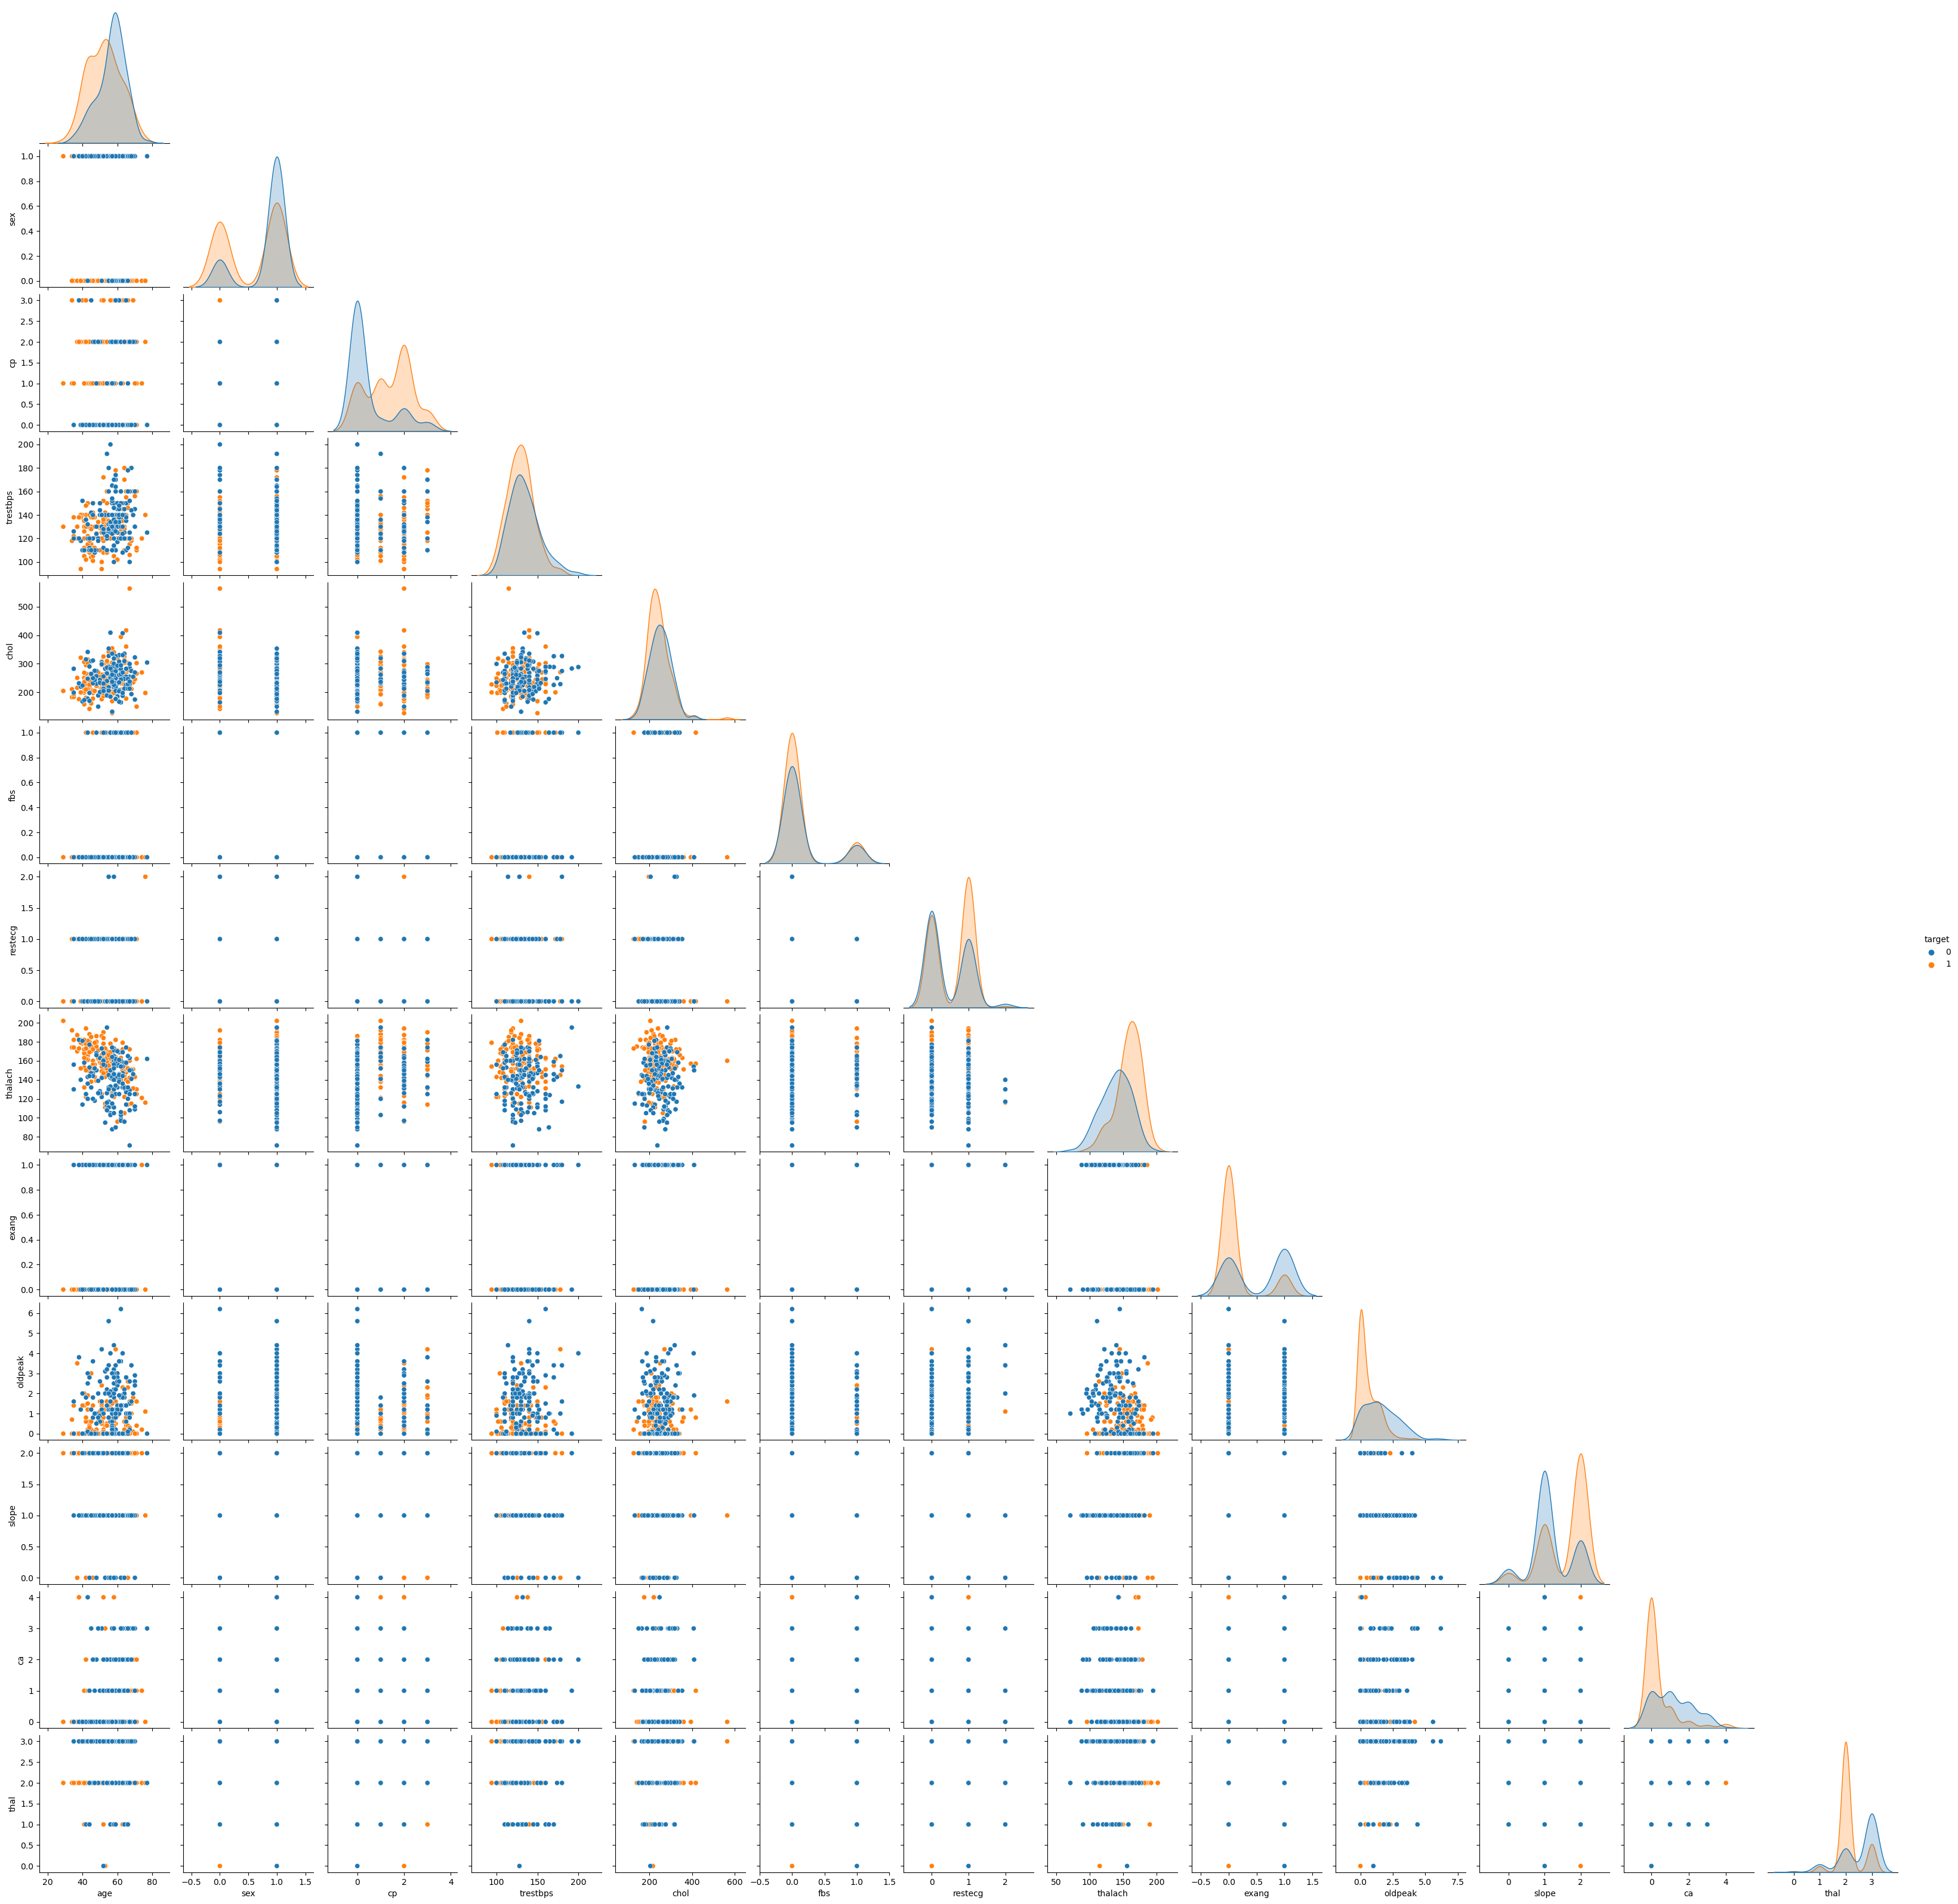

In [38]:
sns.pairplot(data = datasetHeart , hue = 'target', corner = True)

<Axes: >

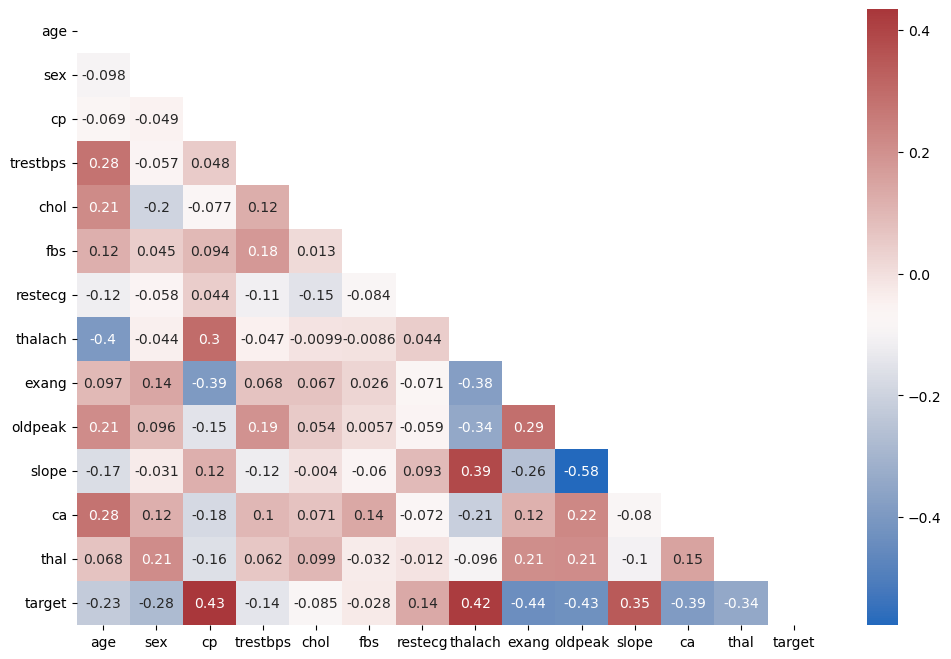

In [39]:
mask=np.triu(np.ones_like(datasetHeart.corr(),dtype=bool))
plt.figure(figsize=(12,8))
sns.heatmap(datasetHeart.corr(),annot=True,mask=mask,cmap= "vlag")

In [40]:
datasetHeart.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [ ]:
# We have weak correlation between data

<Axes: >

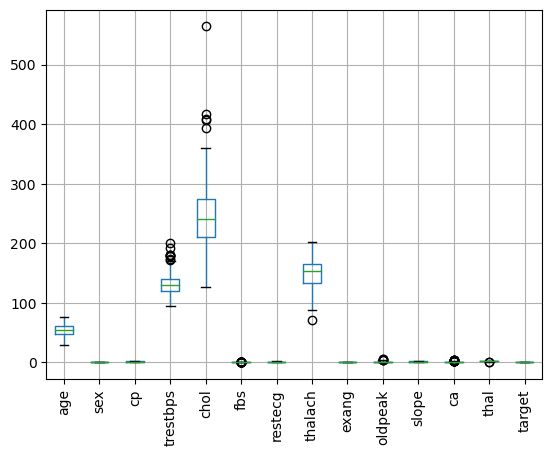

In [41]:
datasetHeart.boxplot(rot=90)

In [42]:
datasetHeart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [43]:
#split data
y = datasetHeart.iloc[:,-1]
data = datasetHeart.drop('target', axis='columns')

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.2, random_state=2)

In [45]:
svclassifier = SVC(kernel='linear')# binary classification its 0 or 1 , yes or no. Kernel='linear'
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [46]:
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[25  7]
 [ 1 28]]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86        32
           1       0.80      0.97      0.88        29

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [47]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[25  7]
 [ 1 28]]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86        32
           1       0.80      0.97      0.88        29

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [48]:
KN = KNeighborsClassifier()
KN.fit(X_train,y_train)
KN_pred = KN.predict(X_test)
print(confusion_matrix(y_test,KN_pred))
print(classification_report(y_test,KN_pred))

[[19 13]
 [ 5 24]]
              precision    recall  f1-score   support

           0       0.79      0.59      0.68        32
           1       0.65      0.83      0.73        29

    accuracy                           0.70        61
   macro avg       0.72      0.71      0.70        61
weighted avg       0.72      0.70      0.70        61



In [49]:
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, y_train)
y2_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y2_pred))
print(classification_report(y_test,y2_pred))

[[18 14]
 [ 3 26]]
              precision    recall  f1-score   support

           0       0.86      0.56      0.68        32
           1       0.65      0.90      0.75        29

    accuracy                           0.72        61
   macro avg       0.75      0.73      0.72        61
weighted avg       0.76      0.72      0.71        61



In [50]:
regr = LogisticRegression() 
regr.fit(X_train, y_train) #training the algorithm
Log_pred = regr.predict(X_test)
print(confusion_matrix(y_test,Log_pred))
print(classification_report(y_test,Log_pred))

[[26  6]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        32
           1       0.83      1.00      0.91        29

    accuracy                           0.90        61
   macro avg       0.91      0.91      0.90        61
weighted avg       0.92      0.90      0.90        61



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
model = Sequential()
model.add(Dense(3, input_dim=13, activation='relu'))  # (inputLayerUnits +1) / 2
model.add(Dense(1, activation='sigmoid'))

In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_without_early=model.fit(X_train, y_train, validation_split=0.35, epochs=200, batch_size=128)

Epoch 1/200
2/2 [==============================] - 0s 99ms/step - loss: 0.6931 - accuracy: 0.4904 - val_loss: 0.6930 - val_accuracy: 0.5765
Epoch 2/200
2/2 [==============================] - 0s 19ms/step - loss: 0.6930 - accuracy: 0.5541 - val_loss: 0.6929 - val_accuracy: 0.5765
Epoch 3/200
2/2 [==============================] - 0s 20ms/step - loss: 0.6929 - accuracy: 0.5541 - val_loss: 0.6927 - val_accuracy: 0.5765
Epoch 4/200
2/2 [==============================] - 0s 19ms/step - loss: 0.6928 - accuracy: 0.5541 - val_loss: 0.6926 - val_accuracy: 0.5765
Epoch 5/200
2/2 [==============================] - 0s 19ms/step - loss: 0.6927 - accuracy: 0.5541 - val_loss: 0.6925 - val_accuracy: 0.5765
Epoch 6/200
2/2 [==============================] - 0s 20ms/step - loss: 0.6927 - accuracy: 0.5541 - val_loss: 0.6924 - val_accuracy: 0.5765
Epoch 7/200
2/2 [==============================] - 0s 19ms/step - loss: 0.6926 - accuracy: 0.5541 - val_loss: 0.6922 - val_accuracy: 0.5765
Epoch 8/200
2/2 [===

2/2 [==============================] - 0s 19ms/step - loss: 0.6897 - accuracy: 0.5541 - val_loss: 0.6879 - val_accuracy: 0.5765
Epoch 60/200
2/2 [==============================] - 0s 19ms/step - loss: 0.6897 - accuracy: 0.5541 - val_loss: 0.6879 - val_accuracy: 0.5765
Epoch 61/200
2/2 [==============================] - 0s 18ms/step - loss: 0.6896 - accuracy: 0.5541 - val_loss: 0.6878 - val_accuracy: 0.5765
Epoch 62/200
2/2 [==============================] - 0s 18ms/step - loss: 0.6896 - accuracy: 0.5541 - val_loss: 0.6878 - val_accuracy: 0.5765
Epoch 63/200
2/2 [==============================] - 0s 19ms/step - loss: 0.6896 - accuracy: 0.5541 - val_loss: 0.6877 - val_accuracy: 0.5765
Epoch 64/200
2/2 [==============================] - 0s 19ms/step - loss: 0.6896 - accuracy: 0.5541 - val_loss: 0.6877 - val_accuracy: 0.5765
Epoch 65/200
2/2 [==============================] - 0s 20ms/step - loss: 0.6895 - accuracy: 0.5541 - val_loss: 0.6876 - val_accuracy: 0.5765
Epoch 66/200
2/2 [========

2/2 [==============================] - 0s 19ms/step - loss: 0.6883 - accuracy: 0.5541 - val_loss: 0.6855 - val_accuracy: 0.5765
Epoch 118/200
2/2 [==============================] - 0s 19ms/step - loss: 0.6883 - accuracy: 0.5541 - val_loss: 0.6854 - val_accuracy: 0.5765
Epoch 119/200
2/2 [==============================] - 0s 19ms/step - loss: 0.6883 - accuracy: 0.5541 - val_loss: 0.6854 - val_accuracy: 0.5765
Epoch 120/200
2/2 [==============================] - 0s 20ms/step - loss: 0.6883 - accuracy: 0.5541 - val_loss: 0.6854 - val_accuracy: 0.5765
Epoch 121/200
2/2 [==============================] - 0s 18ms/step - loss: 0.6883 - accuracy: 0.5541 - val_loss: 0.6854 - val_accuracy: 0.5765
Epoch 122/200
2/2 [==============================] - 0s 19ms/step - loss: 0.6882 - accuracy: 0.5541 - val_loss: 0.6854 - val_accuracy: 0.5765
Epoch 123/200
2/2 [==============================] - 0s 19ms/step - loss: 0.6882 - accuracy: 0.5541 - val_loss: 0.6853 - val_accuracy: 0.5765
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 19ms/step - loss: 0.6877 - accuracy: 0.5541 - val_loss: 0.6840 - val_accuracy: 0.5765
Epoch 176/200
2/2 [==============================] - 0s 19ms/step - loss: 0.6877 - accuracy: 0.5541 - val_loss: 0.6840 - val_accuracy: 0.5765
Epoch 177/200
2/2 [==============================] - 0s 19ms/step - loss: 0.6877 - accuracy: 0.5541 - val_loss: 0.6841 - val_accuracy: 0.5765
Epoch 178/200
2/2 [==============================] - 0s 19ms/step - loss: 0.6877 - accuracy: 0.5541 - val_loss: 0.6841 - val_accuracy: 0.5765
Epoch 179/200
2/2 [==============================] - 0s 20ms/step - loss: 0.6877 - accuracy: 0.5541 - val_loss: 0.6841 - val_accuracy: 0.5765
Epoch 180/200
2/2 [==============================] - 0s 19ms/step - loss: 0.6877 - accuracy: 0.5541 - val_loss: 0.6841 - val_accuracy: 0.5765
Epoch 181/200
2/2 [==============================] - 0s 19ms/step - loss: 0.6877 - accuracy: 0.5541 - val_loss: 0.6841 - val_accuracy: 0.5765
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


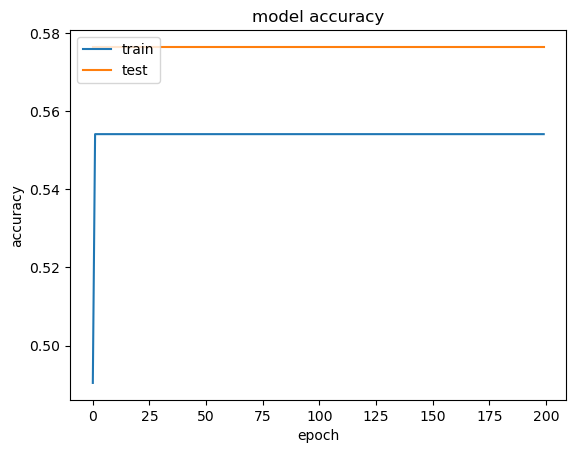

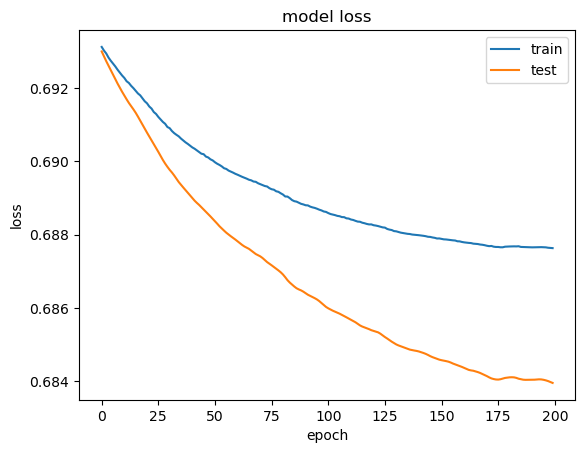

In [56]:
print(model_without_early.history.keys())
# summarize history for accuracy
plt.plot(model_without_early.history['accuracy'])
plt.plot(model_without_early.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_without_early.history['loss'])
plt.plot(model_without_early.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()